In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [4]:
#! pip install scikit-learn==0.22
! pip install imblearn

     |████████████████████████████████| 174kB 2.4MB/s eta 0:00:01
ERROR: Could not find a version that satisfies the requirement scikit-learn>=0.23 (from imbalanced-learn->imblearn) (from versions: 0.9, 0.10, 0.11, 0.12, 0.12.1, 0.13, 0.13.1, 0.14, 0.14.1, 0.15.0b1, 0.15.0b2, 0.15.0, 0.15.1, 0.15.2, 0.16b1, 0.16.0, 0.16.1, 0.17b1, 0.17, 0.17.1, 0.18rc2, 0.18, 0.18.1, 0.18.2, 0.19b2, 0.19.0, 0.19.1, 0.19.2, 0.20rc1, 0.20.0, 0.20.1, 0.20.2, 0.20.3, 0.20.4, 0.21rc2, 0.21.0, 0.21.1, 0.21.2, 0.21.3, 0.22rc2.post1, 0.22rc3, 0.22, 0.22.1, 0.22.2.post1)
ERROR: No matching distribution found for scikit-learn>=0.23 (from imbalanced-learn->imblearn)
You should consider upgrading via the 'pip install --upgrade pip' command.


In [296]:
train=pd.read_csv('C://Users//user//Desktop//Data Science//assignments//credit risk//Credit_Risk_Train_data.csv')
test=pd.read_csv('C://Users//user//Desktop//Data Science//assignments//credit risk//Credit_Risk_Test_data.csv')
print('train data')
train.head()

train data


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [117]:
print('test data')
print(test.head())

test data
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3           

In [118]:
train.shape

(614, 13)

In [119]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [120]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [253]:
train=train.drop(['Loan_ID'],axis=1)

In [250]:
train1=train.select_dtypes(exclude='object')
train1.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

# Data imputation

In [245]:
for i in train1.columns:
    train1[i].fillna(train1[i].median(),inplace=True)
    train[i]=train1[i]

# Plotting Outliers

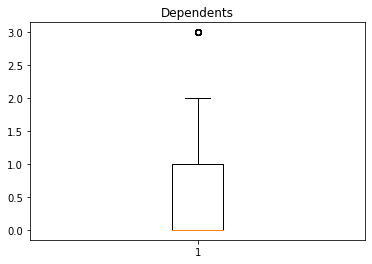

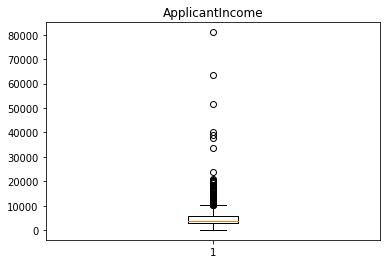

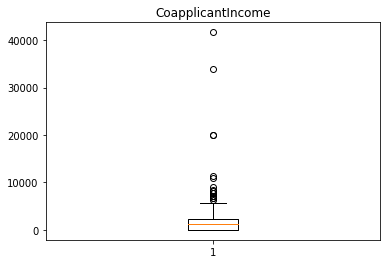

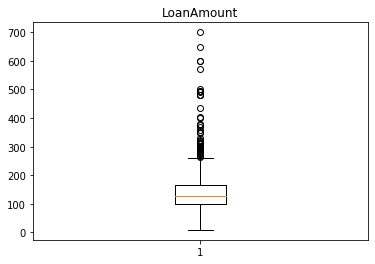

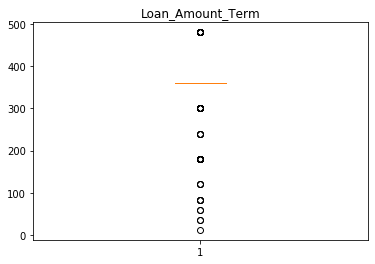

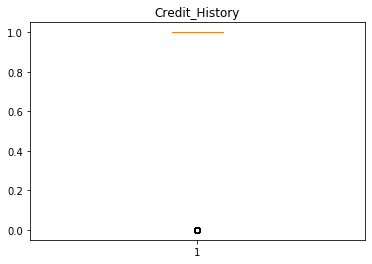

In [266]:
import pylab
for i in train1.columns:
    pylab.figure()
    pylab.boxplot(train[i])
    pylab.title(i)

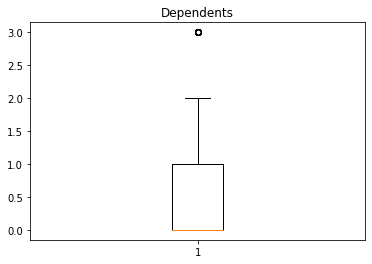

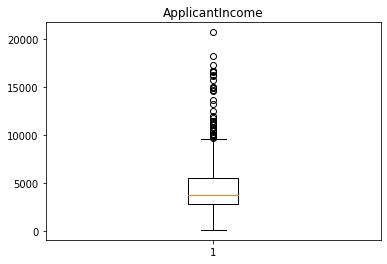

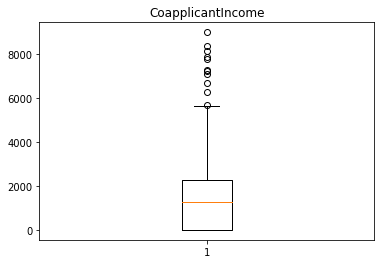

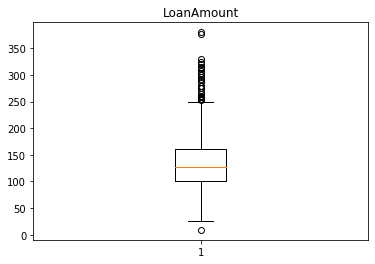

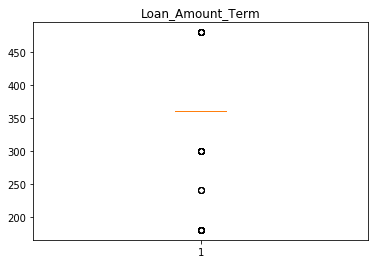

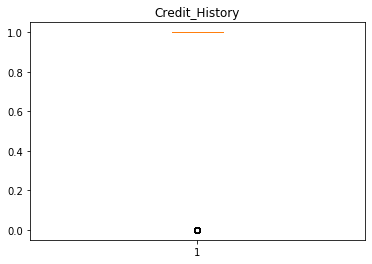

In [267]:
for i in train1.columns:
    pylab.figure()
    pylab.boxplot(tr[i])
    pylab.title(i)

In [152]:
cat=train.select_dtypes(include='object')
cat.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [183]:
cat['Dependents']=cat['Dependents'].replace('3+',3)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [247]:
for i in cat.columns:
    cat[i].fillna(cat[i].mode()[0],inplace=True)
    train[i]=cat[i]


In [287]:
train['Dependents']=train['Dependents'].astype(int)

In [254]:
from sklearn.preprocessing import LabelEncoder
label=cat[['Education','Loan_Status','Gender','Married','Self_Employed','Property_Area']]
le=LabelEncoder()
label1=label.apply(le.fit_transform)
for i in label1.columns:
    train[i]=label1[i]
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [255]:
train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [259]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [262]:
train.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


# removing outliers

In [273]:
from scipy import stats
z=np.abs(stats.zscore(train))
tr=train[(z<3).all(axis=1)]
tr.shape

(577, 12)

In [271]:
tr['Loan_Status'].value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

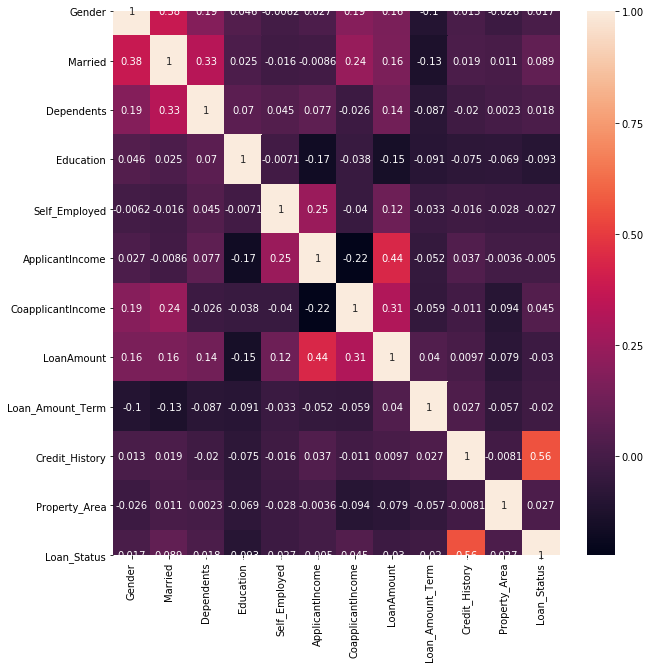

In [277]:
cor=tr.corr()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.heatmap(cor,annot=True)

In [278]:
tr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


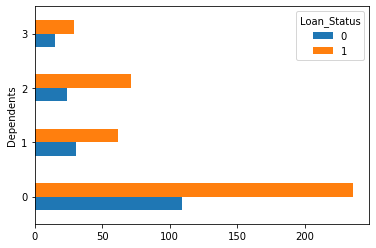

In [285]:
pd.crosstab(tr['Dependents'],tr['Loan_Status']).plot(kind='barh')

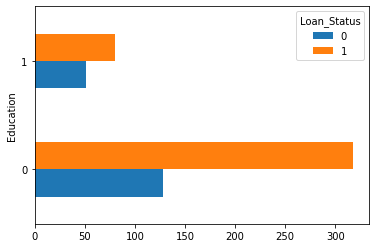

In [288]:
pd.crosstab(tr['Education'],tr['Loan_Status']).plot(kind='barh')

In [289]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


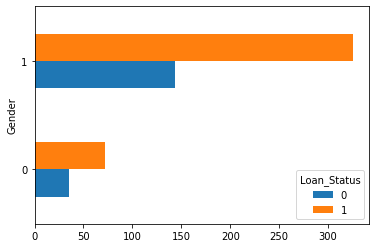

In [290]:
pd.crosstab(tr['Gender'],tr['Loan_Status']).plot(kind='barh')

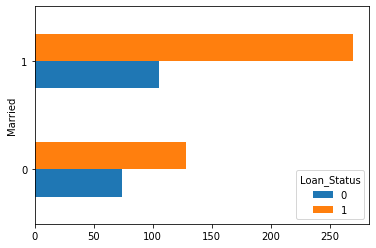

In [292]:
pd.crosstab(tr['Married'],tr['Loan_Status']).plot(kind='barh')

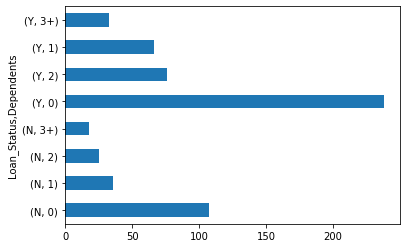

In [300]:
train.groupby('Loan_Status')['Dependents'].value_counts().plot.barh()

In [303]:
tr['Loan_Amount_Term'].unique()

array([360., 240., 180., 300., 480.])

In [306]:
tr['ApplicantIncome'].describe()

count      577.000000
mean      4666.020797
std       2965.452652
min        150.000000
25%       2833.000000
50%       3750.000000
75%       5532.000000
max      20667.000000
Name: ApplicantIncome, dtype: float64

# Binning

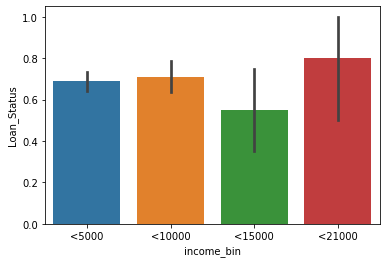

In [325]:
bins=np.linspace(tr['ApplicantIncome'].min(),tr['ApplicantIncome'].max(),5)
labels=['<5000','<10000','<15000','<21000']
tr['income_bin']=pd.cut(tr['ApplicantIncome'],bins,labels=labels)
sns.barplot(tr['income_bin'],tr['Loan_Status'])

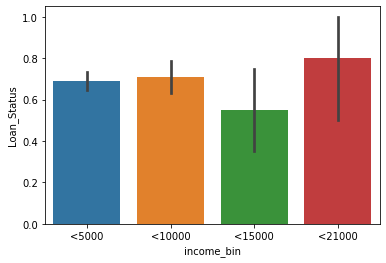

In [324]:
sns.barplot(tr['income_bin'],tr['Loan_Status'])

In [331]:
tr.drop('income_bin',axis=1,inplace=True)

KeyError: "['income_bin'] not found in axis"

# Distribution of all the variables

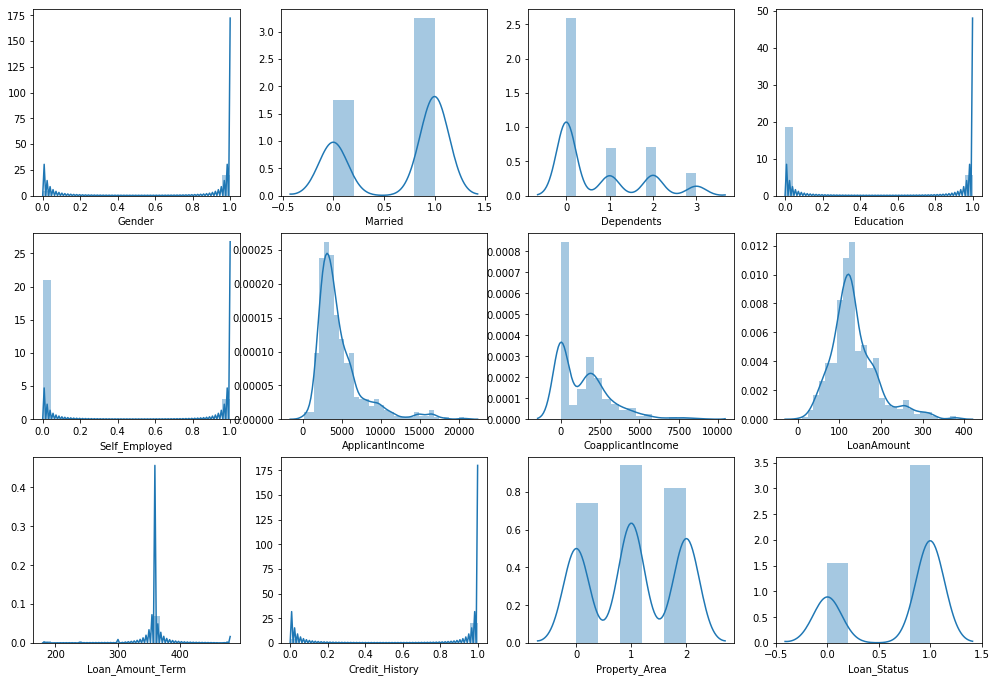

In [334]:
plt.figure(figsize=(17,24))
for i,c in enumerate(tr.columns):
    ax = plt.subplot(6,4,i+1)
    sns.distplot(tr[c])

In [339]:
x=tr.drop('Loan_Status',axis=1)
y=tr['Loan_Status']

  Using cached https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c8/81/8db4d87b03b998fda7c6f835d807c9ae4e3b141f978597b8d7f31600be15/imbalanced_learn-0.7.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/70/8e/682770fc1da047bb56443150bfd8d87d850459cd7cc412a5311de3abaa4a/scikit_learn-0.23.1-cp37-cp37m-win_amd64.whl
  Found existing installation: scikit-learn 0.22
    Uninstalling scikit-learn-0.22:
      Successfully uninstalled scikit-learn-0.22


  Using cached https://files.pythonhosted.org/packages/9d/10/1dd2e3436e13402cc2b16c61b5f7407fb2e8057dcc18461db0d8e3523202/scikit_learn-0.22-cp37-cp37m-win_amd64.whl
  Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


In [1]:
from imblearn.oversampling import SMOTE

ImportError: No module named 'imblearn'

In [2]:
import imblearn

ImportError: No module named 'imblearn'